# Exploratory data analysis for vtalks.net

## Table of contents:

* [Introduction](#introduction)
    * [Setup & Configuration](#setup-and-configuration)
    * [Load the Data Set](#load-the-data-set)
    
* [Youtube Statistics Analysis](#youtube-statistics-analysis)
    * [Youtube Views](#youtube-views)
    * [Youtube Likes](#youtube-likes)
    * [Youtube Dislikes](#youtube-dislikes)
    * [Youtube Favorites](#youtube-favorites)
    
* [Statistics Analysis](#statistics-analysis)
    * [Views](#views)
    * [Likes](#likes)
    * [Dislikes](#dislikes)
    * [Favorites](#favorites)
    
* [Youtube Statistics Histograms](#youtube-statistics-histograms)
    * [Youtube Views Histogram](#youtube-views-histogram)
    * [Youtube Likes Histogram](#youtube-likes-histogram)
    * [Youtube Dislikes Histogram](#youtube-dislikes-histogram)
    * [Youtube Favorites Histogram](#youtube-favorites-histogram)
    
* [Statistics Histograms](#statistics-histograms)
    * [Views Histogram](#views-histogram)
    * [Likes Histogram](#likes-histogram)
    * [Dislikes Histogram](#dislikes-histogram)
    * [Favorites Histogram](#favorites-histogram)

## Introduction <a class="anchor" id="introduction"></a>

This jupyter network describes an exploratory data analysis for a data set of talks published on [vtalks.net](http://www.vtalks.net) website.

We are going to use numpy and pandas to load and analyze our dataset, and we will use matplotlib python libraries for
plotting the results.

In [1]:
!pwd

/Users/raul/Projects/vtalks/jupyter/2018


### Setup & Configuration <a class="anchor" id="setup-and-configuration"></a>

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn

Now we configure matplotlib to ensure we have somne pretty plots :)

In [3]:
%matplotlib inline

seaborn.set()
plt.rc('figure', figsize=(16,8))
plt.style.use('bmh')

plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

### Load the Data Set <a class="anchor" id="load-the-dataset"></a>

And finally load our dataset. Notice that there are different data sets available.

The first one is a general data set with all the information available from the start (around mid 2010) until now. Then there are the same data sets but splitted by year.

In [4]:
data_source = "../../.dataset/vtalks_dataset_2018.csv"
# data_source = "../../.dataset/vtalks_dataset_2017.csv"
# data_source = "../../.dataset/vtalks_dataset_2016.csv"
# data_source = "../../.dataset/vtalks_dataset_2015.csv"
# data_source = "../../.dataset/vtalks_dataset_2014.csv"
# data_source = "../../.dataset/vtalks_dataset_2013.csv"
# data_source = "../../.dataset/vtalks_dataset_2012.csv"
# data_source = "../../.dataset/vtalks_dataset_2011.csv"
# data_source = "../../.dataset/vtalks_dataset_2010.csv"
# data_source = "../../.dataset/vtalks_dataset_all.csv"

data_set = pd.read_csv(
    data_source,
    parse_dates=[1],
    dtype={
        'id': int,
        'youtube_view_count': int, 
        'youtube_like_count': int,
        'youtube_dislike_count': int,
        'youtube_favorite_count': int,
        'view_count': int, 
        'like_count': int,
        'dislike_count': int,
        'favorite_count': int,
    })

In [5]:
data_set.dtypes

id                                 int64
created                   datetime64[ns]
youtube_view_count                 int64
youtube_like_count                 int64
youtube_dislike_count              int64
youtube_favorite_count             int64
view_count                         int64
like_count                         int64
dislike_count                      int64
favorite_count                     int64
dtype: object

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 10 columns):
id                        3933 non-null int64
created                   3933 non-null datetime64[ns]
youtube_view_count        3933 non-null int64
youtube_like_count        3933 non-null int64
youtube_dislike_count     3933 non-null int64
youtube_favorite_count    3933 non-null int64
view_count                3933 non-null int64
like_count                3933 non-null int64
dislike_count             3933 non-null int64
favorite_count            3933 non-null int64
dtypes: datetime64[ns](1), int64(9)
memory usage: 307.3 KB


In [7]:
data_set.head()

,id,created,youtube_view_count,youtube_like_count,youtube_dislike_count,youtube_favorite_count,view_count,like_count,dislike_count,favorite_count
0,19943,2018-07-16 16:41:20,49,2,0,0,1,0,0,0
1,19942,2018-07-16 16:39:50,48,1,0,0,0,0,0,0
2,19941,2018-07-16 16:38:17,39,0,0,0,0,0,0,0
3,19910,2018-07-16 16:34:08,64,1,0,0,0,0,0,0
4,19940,2018-07-16 16:25:58,30,0,0,0,0,0,0,0


In [8]:
data_set.describe()

,id,youtube_view_count,youtube_like_count,youtube_dislike_count,youtube_favorite_count,view_count,like_count,dislike_count,favorite_count
count,3933.000000,3.933000e+03,3933.000000,3933.000000,3933.0,3933.000000,3933.000000,3933.000000,3933.000000
mean,10867.822273,2.581177e+03,34.963641,2.145182,0.0,10.622171,0.002288,0.002034,0.000254
std,4921.238844,6.373261e+04,591.255115,68.309652,0.0,9.219718,0.113865,0.112748,0.015945
min,391.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,5832.000000,8.100000e+01,1.000000,0.000000,0.0,6.000000,0.000000,0.000000,0.000000
50%,11416.000000,2.300000e+02,3.000000,0.000000,0.0,10.000000,0.000000,0.000000,0.000000
75%,14916.000000,7.470000e+02,11.000000,0.000000,0.0,13.000000,0.000000,0.000000,0.000000
max,19944.000000,3.966597e+06,35694.000000,4271.000000,0.0,132.000000,7.000000,7.000000,1.000000


In [9]:
pp.ProfileReport(data_set)

Number of variables,10
Number of observations,3933
Total Missing (%),0.0%
Total size in memory,307.3 KiB
Average record size in memory,80.0 B
Numeric,4
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,5


## Youtube Statistics Analysis <a class="anchor" id="youtube-statistics-analysis"></a>

### Youtube Views <a class="anchor" id="youtube-views"></a>

In [10]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_views': data_set.youtube_view_count,
})

#### Descriptive analysis:

##### Count

In [11]:
count = data_set.youtube_view_count.count()
"Count: {:d}".format(count)

'Count: 3933'

##### Minimum, Index Minimum, Maximum, Index Maximum

In [12]:
min = data_set.youtube_view_count.min()
max = data_set.youtube_view_count.max()
index_min = data_set.youtube_view_count.idxmin()
index_max = data_set.youtube_view_count.idxmax()
"Minimum: {:d} Index Minimum: {:d} - Maximum {:d} Index Maximum: {:d}".format(min, index_min, max, index_max)

'Minimum: 0 Index Minimum: 3727 - Maximum 3966597 Index Maximum: 1252'

##### Quantile 50%

In [13]:
quantile = data_set.youtube_view_count.quantile()
"Quantile 50%: {:f}".format(quantile)

'Quantile 50%: 230.000000'

##### Sum

In [14]:
sum = data_set.youtube_view_count.sum()
"Sum: {:d}".format(sum)

'Sum: 10151768'

##### Mean

In [15]:
mean = data_set.youtube_view_count.mean()
"Mean: {:f}".format(mean)

'Mean: 2581.176710'

##### Arithmetic median (50% quantile) of values

In [16]:
median = data_set.youtube_view_count.median()
"Arithmetic median (50% quantile) of values {:f}".format(median)

'Arithmetic median (50% quantile) of values 230.000000'

##### Mean absolute deviation from mean value

In [17]:
mad = data_set.youtube_view_count.mad()
"Mean absolute deviation from mean value {:f}".format(mad)

'Mean absolute deviation from mean value 3940.810650'

##### Product of all values

In [18]:
prod = data_set.youtube_view_count.prod()
"Product of all values {:f}".format(prod)

'Product of all values 0.000000'

##### Sample variance of values

In [19]:
var = data_set.youtube_view_count.var()
"Sample variance of values {:f}".format(var)

'Sample variance of values 4061845724.027006'

##### Sample standard deviation of values

In [20]:
std = data_set.youtube_view_count.std()
"Sample standard deviation of values {:f}".format(std) 

'Sample standard deviation of values 63732.611150'

##### Sample skewness (third moment) of values

In [21]:
skew = data_set.youtube_view_count.skew()
"Sample skewness (third moment) of values {:f}".format(skew)

'Sample skewness (third moment) of values 61.266620'

##### Sample kurtosis (fourth moment) of values

In [22]:
kurt = data_set.youtube_view_count.kurt()
"Sample kurtosis (fourth moment) of values {:f}".format(kurt)

'Sample kurtosis (fourth moment) of values 3809.088090'

##### Cumsum

In [23]:
cumsum = data_set.youtube_view_count.cumsum()
cumsum.head()

0     49
1     97
2    136
3    200
4    230
Name: youtube_view_count, dtype: int64

##### Cummin

In [24]:
cummin = data_set.youtube_view_count.cummin()
cummin.head()

0    49
1    48
2    39
3    39
4    30
Name: youtube_view_count, dtype: int64

##### Cummax

In [25]:
cummax = data_set.youtube_view_count.cummin()
cummax.head()

0    49
1    48
2    39
3    39
4    30
Name: youtube_view_count, dtype: int64

##### Cumprod

In [26]:
cumprod = data_set.youtube_view_count.cumprod()
cumprod.head()

0           49
1         2352
2        91728
3      5870592
4    176117760
Name: youtube_view_count, dtype: int64

##### Diff

In [27]:
diff = data_set.youtube_view_count.diff()
diff.head()

0     NaN
1    -1.0
2    -9.0
3    25.0
4   -34.0
Name: youtube_view_count, dtype: float64

##### Percent change

In [28]:
pct_change = data_set.youtube_view_count.pct_change()
pct_change.head()

0         NaN
1   -0.020408
2   -0.187500
3    0.641026
4   -0.531250
Name: youtube_view_count, dtype: float64

#### Bar Plot

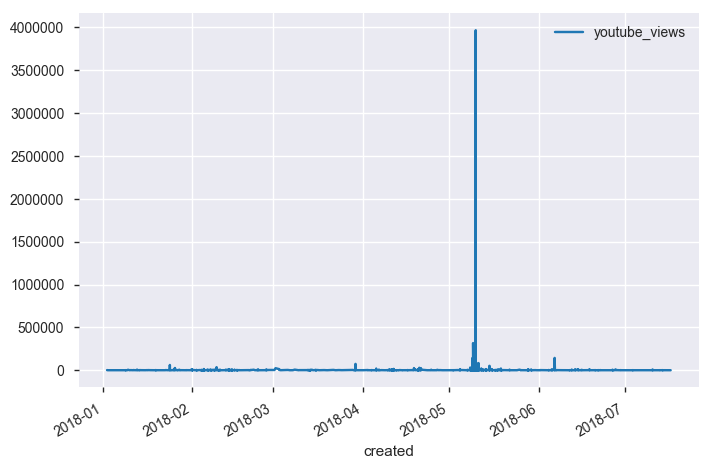

In [29]:
plot_data_set.plot(x='created');

### Youtube Likes <a class="anchor" id="youtube-likes"></a>

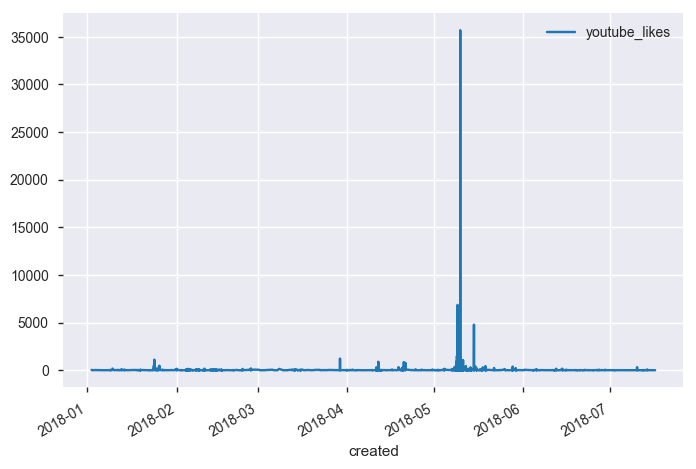

In [30]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_likes': data_set.youtube_like_count,
})
plot_data_set.plot(x='created');

### Youtube Dislikes <a class="anchor" id="youtube-dislikes"></a>

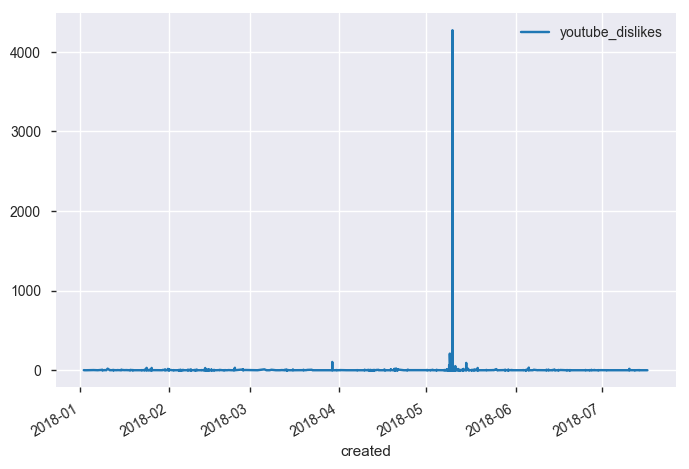

In [31]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_dislikes': data_set.youtube_dislike_count,
})
plot_data_set.plot(x='created');

### Youtube Favorites <a class="anchor" id="youtube-favorites"></a>

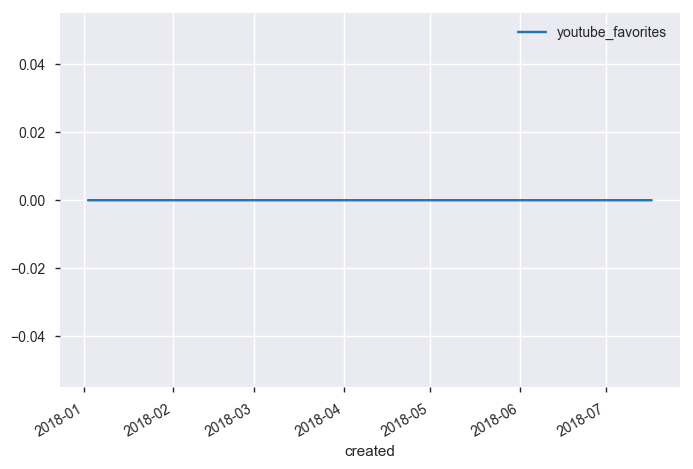

In [32]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'youtube_favorites': data_set.youtube_favorite_count,
})
plot_data_set.plot(x='created');

## Statistics Analysis <a class="anchor" id="statistics-analysis"></a>

### Views <a class="anchor" id="views"></a>

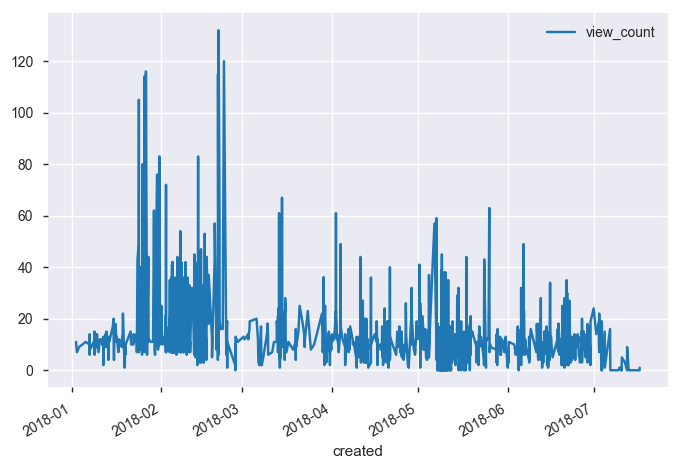

In [33]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'view_count': data_set.view_count,
})
plot_data_set.plot(x='created');

### Likes <a class="anchor" id="likes"></a>

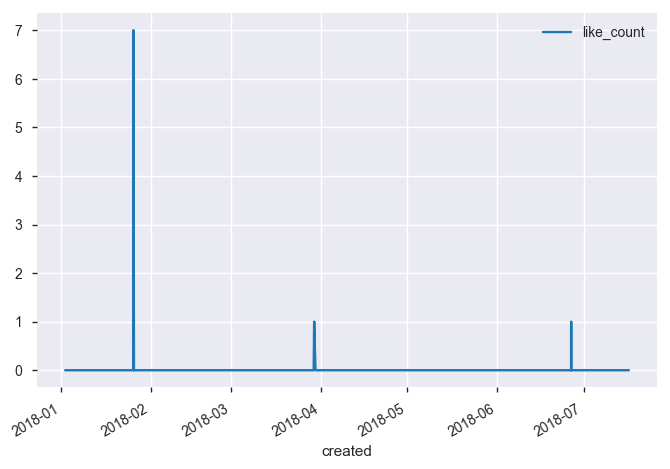

In [34]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'like_count': data_set.like_count,
})
plot_data_set.plot(x='created');

### Dislikes <a class="anchor" id="dislikes"></a>

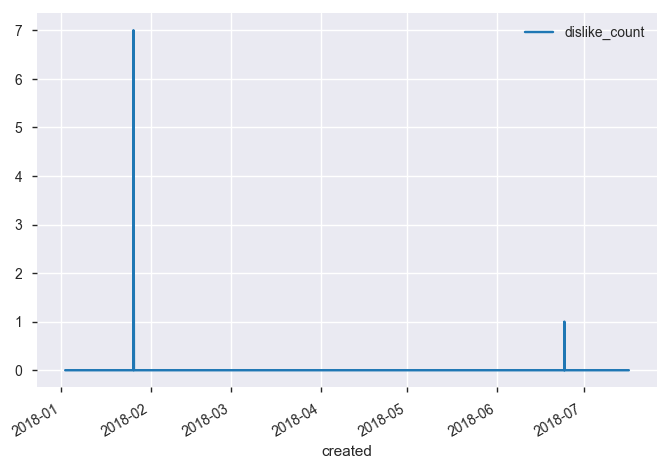

In [35]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'dislike_count': data_set.dislike_count,
})
plot_data_set.plot(x='created');

### Favorites <a class="anchor" id="favorites"></a>

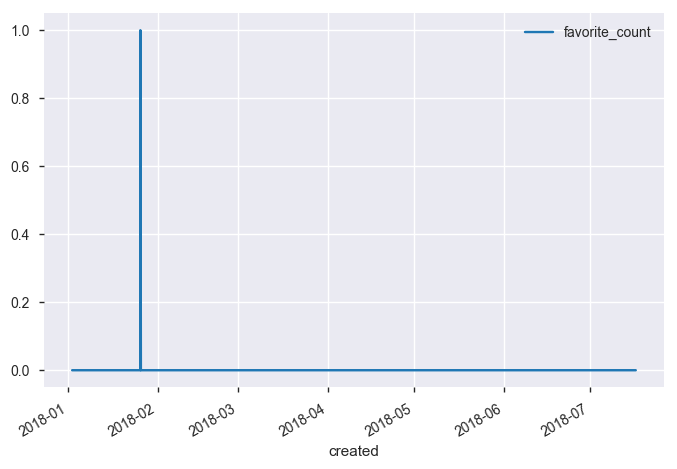

In [36]:
plot_data_set = pd.DataFrame({
    'created': data_set.created,
    'favorite_count': data_set.favorite_count,
})
plot_data_set.plot(x='created');

## Youtube Statistics Histograms <a class="anchor" id="youtube-statistics-histograms"></a>

A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).

Basically, histograms are used to represent data given in form of some groups. X-axis is about bin ranges where Y-axis talks about frequency.

### Youtube Views Histogram <a class="anchor" id="youtube-views-histogram"></a>

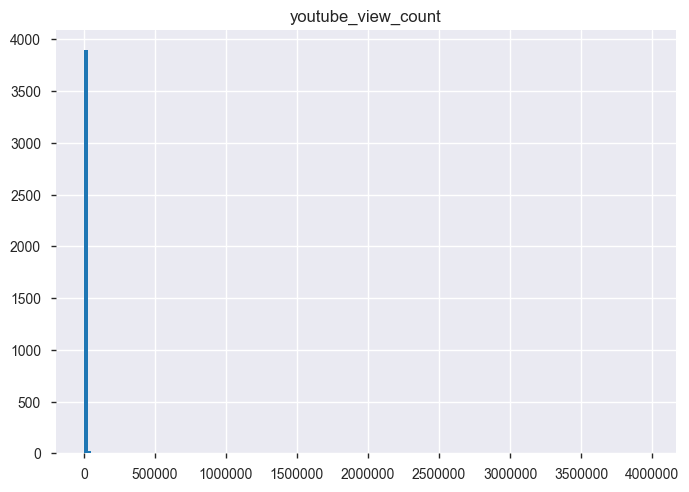

In [37]:
plot_data_set = pd.DataFrame({'youtube_view_count': data_set.youtube_view_count}, columns=['youtube_view_count'])
plot_data_set.hist(bins=150);

### Youtube Like Histogram <a class="anchor" id="youtube-likes-histogram"></a>

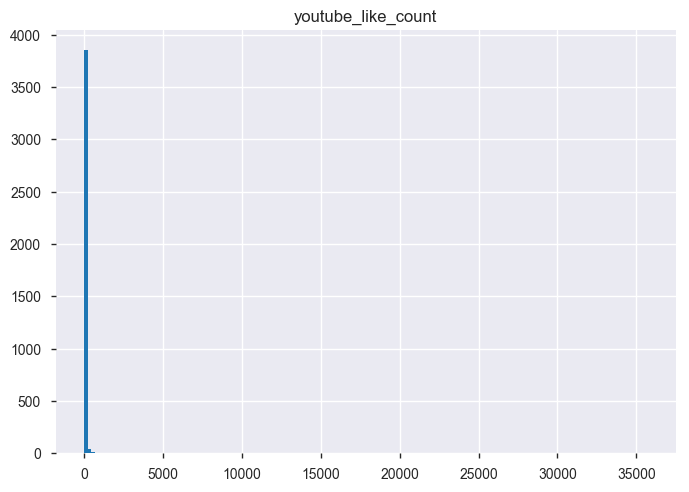

In [38]:
plot_data_set = pd.DataFrame({'youtube_like_count': data_set.youtube_like_count}, columns=['youtube_like_count'])
plot_data_set.hist(bins=150);

### Youtube Dislike Histogram <a class="anchor" id="youtube-dislikes-histogram"></a>

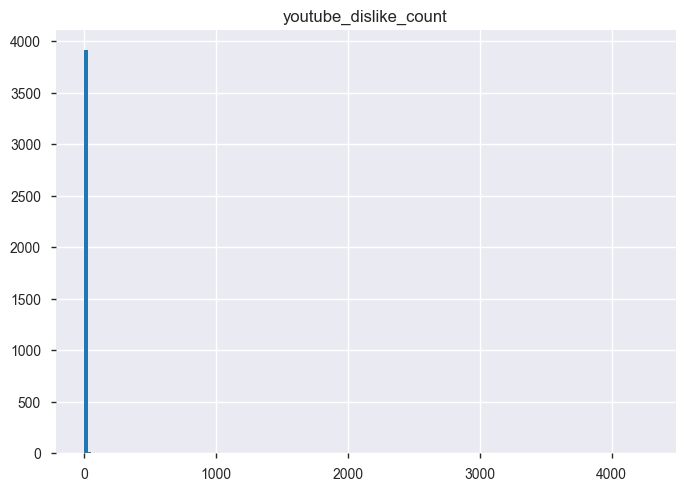

In [39]:
plot_data_set = pd.DataFrame({'youtube_dislike_count': data_set.youtube_dislike_count}, columns=['youtube_dislike_count'])
plot_data_set.hist(bins=150);

### Youtube Favorite Histogram <a class="anchor" id="youtube-favorites-histogram"></a>

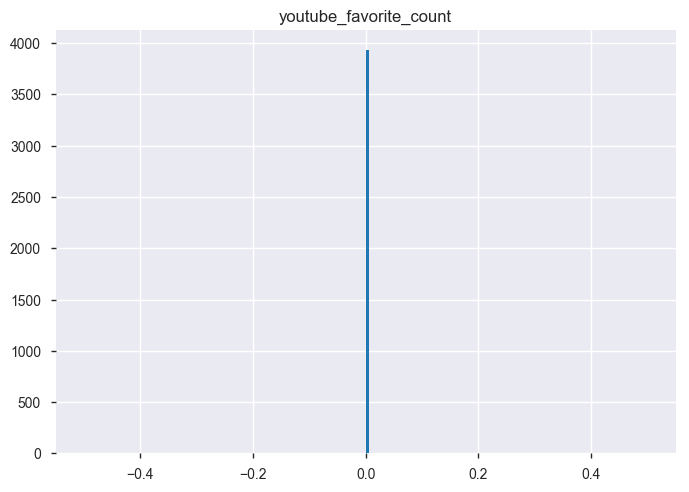

In [40]:
plot_data_set = pd.DataFrame({'youtube_favorite_count': data_set.youtube_favorite_count}, columns=['youtube_favorite_count'])
plot_data_set.hist(bins=150);

## Statistics Histograms <a class="anchor" id="statistics-histogram"></a>

### View Histogram <a class="anchor" id="views-histogram"></a>

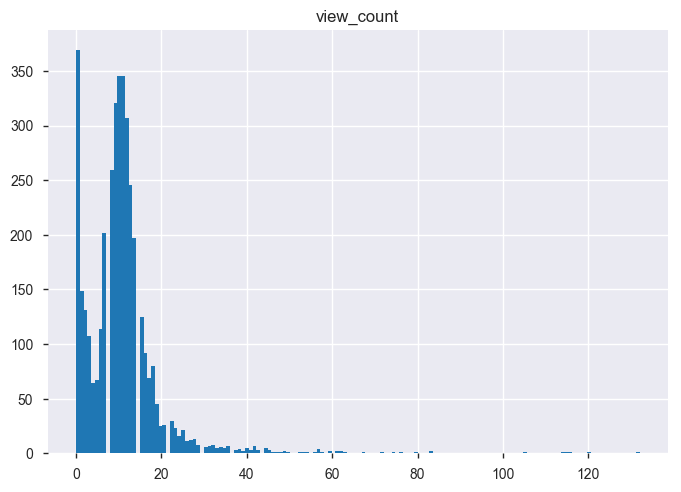

In [41]:
plot_data_set = pd.DataFrame({'view_count': data_set.view_count}, columns=['view_count'])
plot_data_set.hist(bins=150);

### Likes Histogram <a class="anchor" id="likes-histogram"></a>

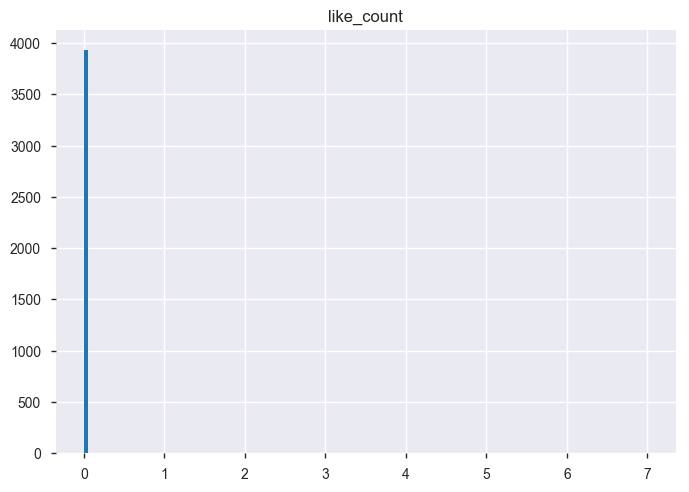

In [42]:
plot_data_set = pd.DataFrame({'like_count': data_set.like_count}, columns=['like_count'])
plot_data_set.hist(bins=150);

### Dislikes Histogram <a class="anchor" id="dislikes-histogram"></a>

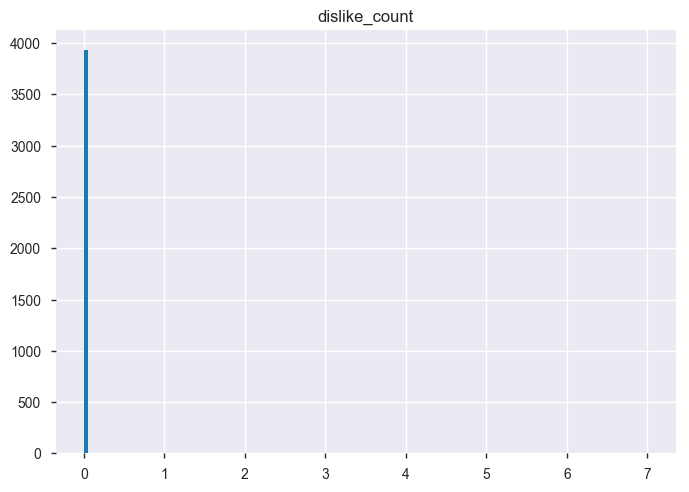

In [43]:
plot_data_set = pd.DataFrame({'dislike_count': data_set.dislike_count}, columns=['dislike_count'])
plot_data_set.hist(bins=150);

### Favorites Histogram <a class="anchor" id="favorites-histogram"></a>

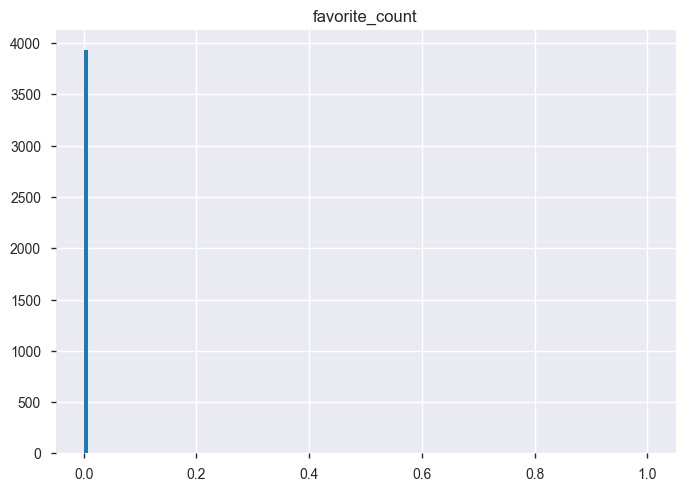

In [44]:
plot_data_set = pd.DataFrame({'favorite_count': data_set.favorite_count}, columns=['favorite_count'])
plot_data_set.hist(bins=150);